In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [3]:
# Load Data and Preprocess
def load_data(filepath):
    pass
#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [4]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    # df = # TODO: Load CSV with correct separator
    df = pd.read_csv(filepath, sep=';')


    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    # X = # TODO: Select features
    X = df[features]

    # TODO: Scale the features
    # X_scaled = # TODO: Apply StandardScaler
    scalar = StandardScaler()
    X_scaled = scalar.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


In [5]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """

        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids
        # raise NotImplementedError("_initialize_centroids must be implemented by the student")

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        n_samples = X.shape[0]
        distances = np.zeros((n_samples, self.n_clusters))

        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)

        labels = np.argmin(distances, axis=1)
        return labels
        # raise NotImplementedError("_assign_clusters must be implemented by the student")

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        n_features = X.shape[1]
        new_centroids = np.zeros((self.n_clusters, n_features))

        for i in range(self.n_clusters):
            cluster_points = X[labels == i]

            if len(cluster_points) > 0:
                new_centroids[i] = cluster_points.mean(axis=0)
            else:
                # Handle empty cluster: re-initialize
                indices = np.random.choice(X.shape[0], 1, replace=False)
                new_centroids[i] = X[indices]

        return new_centroids
        # raise NotImplementedError("_update_centroids must be implemented by the student")

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            self.labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, self.labels)

            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                break

            self.centroids = new_centroids

        self.labels = self._assign_clusters(X) # Final assignment
        return self
        # raise NotImplementedError("fit must be implemented by the student")

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

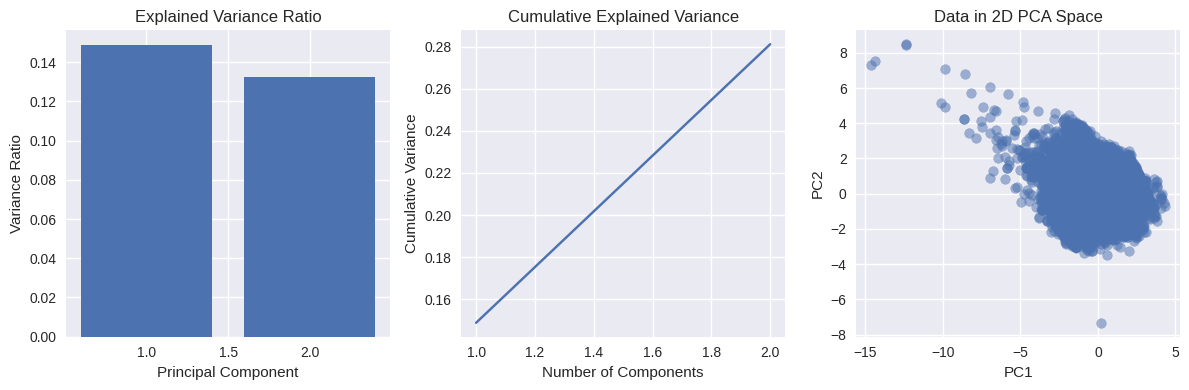

Shape after PCA: (45211, 2)


In [6]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(12, 4))

    # Plot explained variance
    plt.subplot(1, 3, 1)
    plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
    plt.title('Explained Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')

    # Plot cumulative explained variance
    plt.subplot(1, 3, 2)
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance')

    # Plot data in 2D
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.title('Data in 2D PCA Space')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

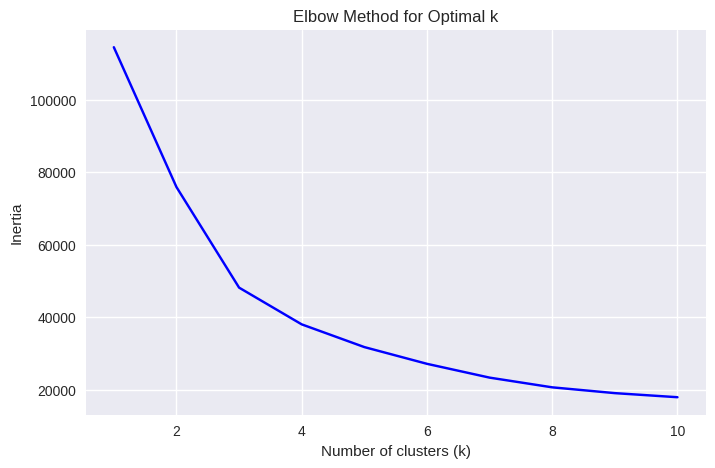

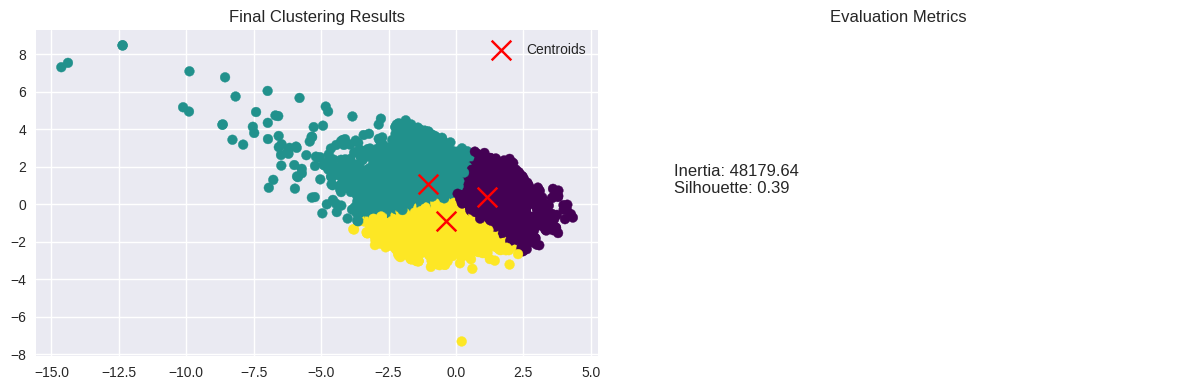


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [7]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    for k in range(len(centroids)):
        points = X[labels == k]
        if len(points) > 0:
            inertia += np.sum((points - centroids[k])**2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)

    # Calculate inertia for different k values
    for k in K:
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)

    # Create elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.legend()

# Plot evaluation metrics
plt.subplot(1, 2, 2)
# Your code here: Add relevant evaluation metric plots
plt.text(0.1, 0.5, f'Inertia: {calculate_inertia(X_pca, kmeans.labels, kmeans.centroids):.2f}\nSilhouette: {silhouette_score(X_pca, kmeans.labels):.2f}', fontsize=12)
plt.title('Evaluation Metrics')
plt.axis('off')

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

Cluster sizes: {np.int64(0): np.int64(15411), np.int64(1): np.int64(10541), np.int64(2): np.int64(19259)}


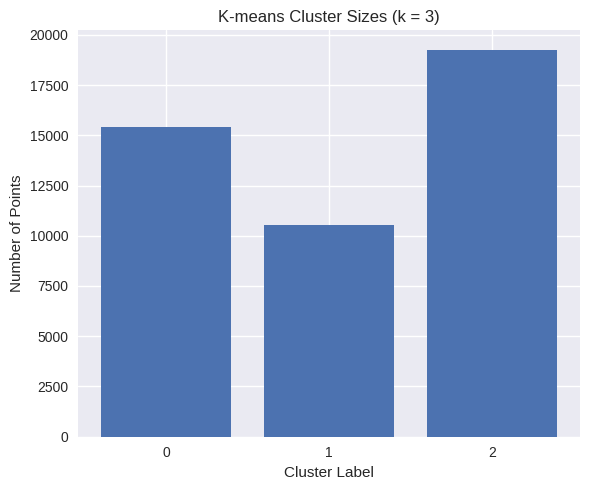

In [11]:
# Use labels from your fitted custom KMeansClustering
labels = kmeans.labels

unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:", cluster_sizes)

plt.figure(figsize=(6, 5))
plt.bar(cluster_sizes.keys(), cluster_sizes.values())
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.title("K-means Cluster Sizes (k = 3)")
plt.xticks(list(cluster_sizes.keys()))
plt.tight_layout()
plt.show()


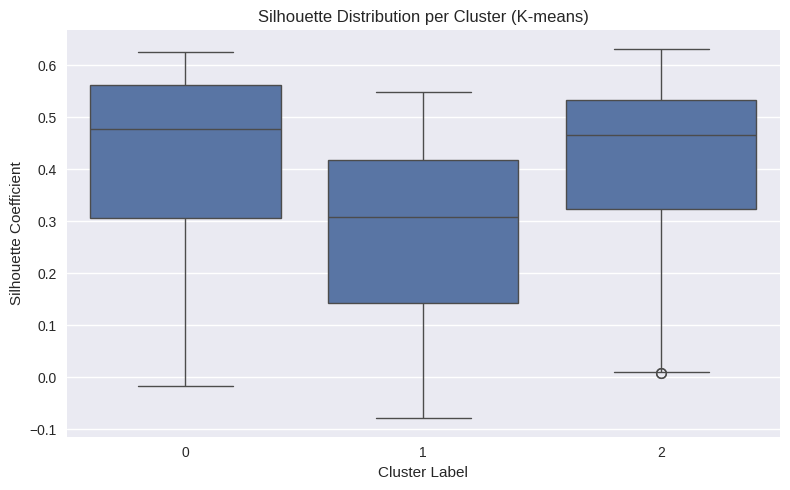

In [14]:
from sklearn.metrics import silhouette_samples   # ← REQUIRED import

# Silhouette values for each point
sil_values = silhouette_samples(X_pca, labels)

sil_df = pd.DataFrame({
    "silhouette": sil_values,
    "cluster": labels
})

plt.figure(figsize=(8, 5))
sns.boxplot(x="cluster", y="silhouette", data=sil_df)
plt.xlabel("Cluster Label")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Distribution per Cluster (K-means)")
plt.tight_layout()
plt.show()


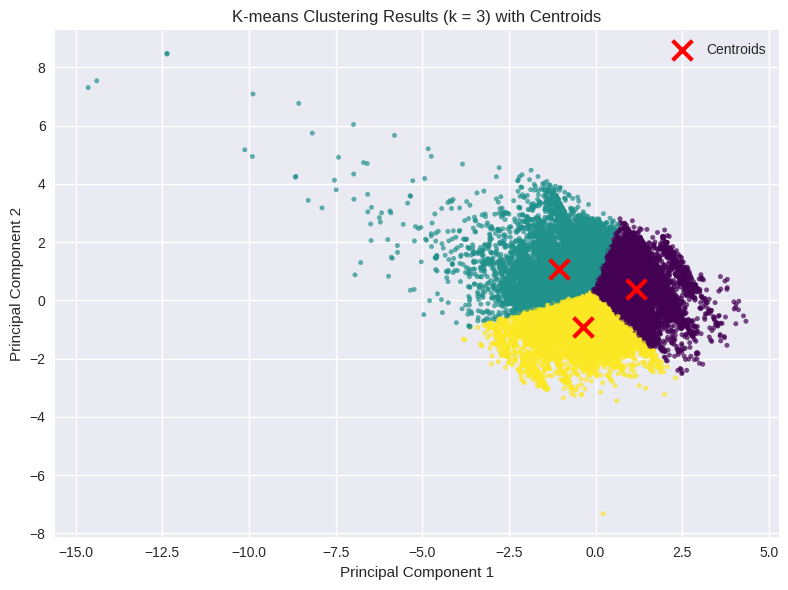

In [15]:
# Make sure KMeansClustering is already fitted:
# kmeans = KMeansClustering(n_clusters=3, random_state=42)
# kmeans.fit(X_pca)

labels = kmeans.labels
centroids = kmeans.centroids

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering Results (k = 3) with Centroids")
plt.legend()
plt.tight_layout()
plt.show()


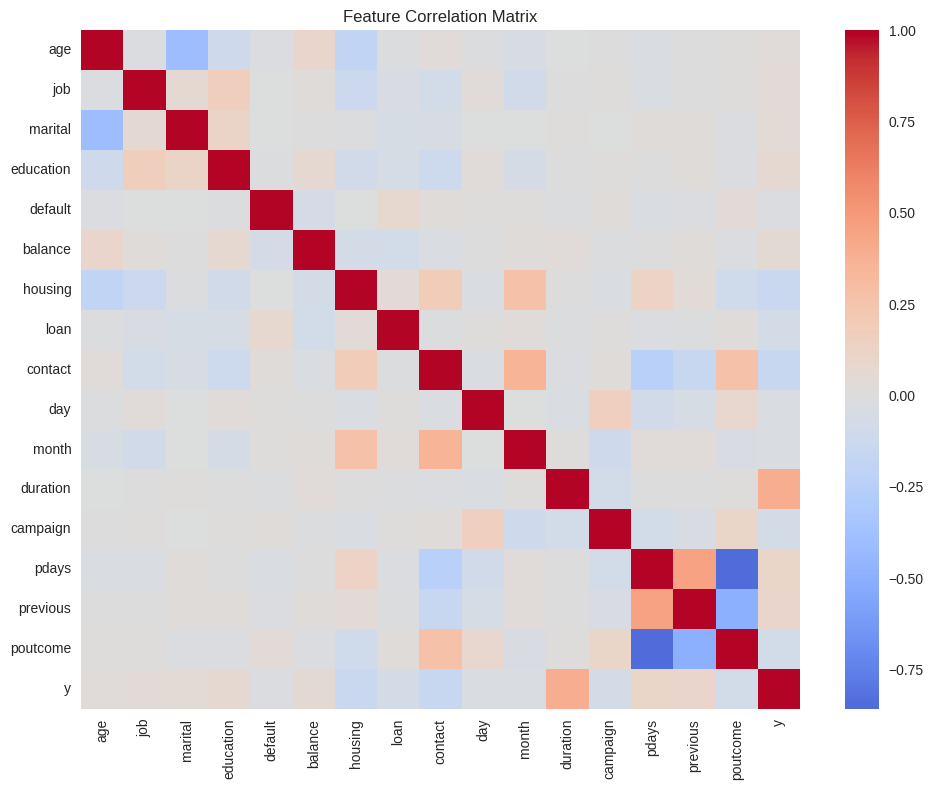

In [17]:
plt.figure(figsize=(10, 8))

# If df contains only numeric columns, this is enough:
corr = data.corr()

# If df contains categorical + numeric, use:
# corr = df.select_dtypes(include=['number']).corr()

sns.heatmap(corr, cmap='coolwarm', annot=False, center=0)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [8]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        n_samples = X.shape[0]
        # 1. Start with all points assigned to label 0
        self.labels_ = np.zeros(n_samples, dtype=int)

        active_clusters = [0]
        next_label_id = 1
        self.centers_[0] = X.mean(axis=0)

        # 2. Loop until we have the desired number of clusters
        while len(active_clusters) < self.n_clusters:

            # 3. Select the largest cluster to split
            largest_cluster_label = -1
            max_size = -1
            for label in active_clusters:
                size = np.sum(self.labels_ == label)
                if size > max_size:
                    max_size = size
                    largest_cluster_label = label

            if max_size < 2:
                break # Stop if clusters are too small to split

            cluster_mask = (self.labels_ == largest_cluster_label)
            cluster_points = X[cluster_mask]

            # 4. Run binary KMeans on these points
            kmeans_split = SklearnKMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            kmeans_split.fit(cluster_points)

            # 5. Assign new labels
            original_indices = np.where(cluster_mask)[0]
            split_labels = kmeans_split.labels_

            child_label_1 = largest_cluster_label
            child_label_2 = next_label_id
            next_label_id += 1

            self.labels_[original_indices[split_labels == 0]] = child_label_1
            self.labels_[original_indices[split_labels == 1]] = child_label_2

            # 6. Record split metadata
            self.split_tree[largest_cluster_label] = (child_label_1, child_label_2)
            self.centers_[child_label_1] = kmeans_split.cluster_centers_[0]
            self.centers_[child_label_2] = kmeans_split.cluster_centers_[1]

            active_clusters.remove(largest_cluster_label)
            active_clusters.append(child_label_1)
            active_clusters.append(child_label_2)

        return self.labels_
        # raise NotImplementedError('Implement the bisecting algorithm as a student exercise')

# Example (for instructor use only):
# bisect = BisectingKMeans(n_clusters=4)
# labels = bisect.fit_predict(X_pca)
# plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)


Running Bisecting K-Means...


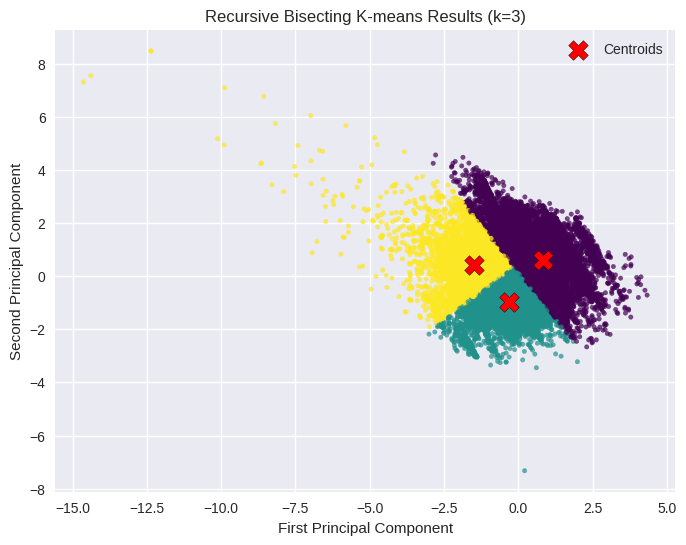


Final cluster labels created: [0 1 2]
Silhouette Score (Bisecting K-Means): 0.34


In [ ]:
from sklearn.cluster import KMeans as SklearnKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

print("Running Bisecting K-Means...")

bisect = BisectingKMeans(n_clusters=3, random_state=42)

labels = bisect.fit_predict(X_pca)

final_labels = np.unique(labels)
final_centroids_list = [bisect.centers_[label] for label in final_labels]
final_centroids_array = np.array(final_centroids_list)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=10, alpha=0.7)

plt.scatter(final_centroids_array[:, 0], final_centroids_array[:, 1],
            c='red', marker='X', s=200, label='Centroids', edgecolor='black')

plt.title('Recursive Bisecting K-means Results (k=3)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.savefig("bisecting_kmeans_clusters.png")
plt.show()

silhouette_bisect = silhouette_score(X_pca, labels)

print(f"\nFinal cluster labels created: {np.unique(labels)}")
print(f"Silhouette Score (Bisecting K-Means): {silhouette_bisect:.2f}")

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!